In [1]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns

In [2]:
r25_path = "..//data//route25_potential_and_real_stops.csv"
ridership = "..//data//Stop_Riders_Ranking_by_Route_Daily_Totals_May_2019.csv"

In [3]:
r25_stop_ids = pd.read_csv(r25_path, usecols=['Est_TotPop','CorrespondingStopID'])
r25_stop_ids.dropna(inplace=True)

In [5]:
ridership_data = pd.read_csv(ridership, usecols=['UNIQUE_STOP_NUMBER', 'TOTAL', 'IndividRoute'])

In [6]:
ridership_data = ridership_data[ridership_data['IndividRoute'] == 25]
ridership_data.rename(columns={'UNIQUE_STOP_NUMBER' : 'CorrespondingStopID'}, inplace=True)

In [8]:
final_data = pd.merge(r25_stop_ids, ridership_data, on='CorrespondingStopID', how='inner')
final_data['TOTAL'] = final_data['TOTAL'].astype(int)

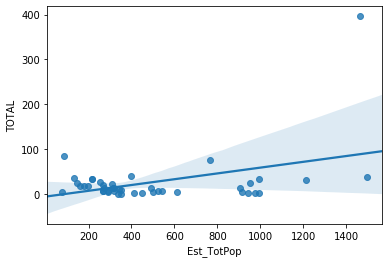

In [14]:
plt = sns.regplot(x=final_data['Est_TotPop'], y=final_data['TOTAL'])
fig = plt.get_figure()
fig.savefig('..//plots//linear_pop_v_util.png')